# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
!pip3 install graphviz
!pip3 install tqdm


You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [3]:
import scipy.stats
import warnings
import graphviz
from tqdm import tqdm_notebook
from matplotlib.pyplot import figure

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

**Ответ**<br>
Деревья не требуют масштабирования данных. Каждый признак обрабатывается отдельно в вершине дерева, а возможные разбиения данных не зависят от масштабирования, деревья решений не нуждаются в таких процедурах предварительной обработки, как нормализация или стандартизация признаков.<br>
Деревья решений хорошо работают, когда есть признаки, измеренные в разных шкалах, или когда данные представляют смесь бинарных и непрерывных признаков.<br>
Монотонные и линейные функции рассматривать не стоит, тк дерево решений смотрит на значение больше какого-то и нет разницы смотреть на это значение исходное или преобразованное по монотонной функции(или по линейной функции)<br>
Кодирование скрывает порядок важности функций, которые не участвовали в кодировании, делая модель неэффективной, поэтому не стоит преобразовывать категориальные признаки

---
### Задача 2.

Рассмотрим данные из <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

In [4]:
data = pd.read_csv('day.csv', parse_dates=[1])
data = data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
train, test = train_test_split(data, test_size=0.2, random_state=43)
train, validation = train_test_split(train, test_size=0.25, random_state=42)
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] 
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'


Выполните необходимые преобразования признаков

In [5]:
def quick_analysis(df): 
    print("Типы данных:") 
    print(df.dtypes) 
    print("Строки и столбцы:") 
    print(df.shape) 
    print("Имена столбцов:") 
    print(df.columns) 
    print ("Пропуски данных") 
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))

quick_analysis(train)

Типы данных:
season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object
Строки и столбцы:
(438, 11)
Имена столбцов:
Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')
Пропуски данных
season        0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64


Видим, что пропусков в данных нет и строковых данных нет, только числовые

In [6]:
train.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,2.497717,6.593607,0.034247,2.958904,0.650685,1.399543,0.494194,0.473391,0.632291,0.190800,4474.356164
std,1.121353,3.465311,0.182070,2.059337,0.477299,0.547681,0.182196,0.162214,0.146199,0.078247,1911.128472
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,22.000000
25%,1.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.338125,0.338050,0.518696,0.133236,3210.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.506666,0.493050,0.631250,0.179113,4516.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.650000,0.603554,0.732500,0.236321,5695.250000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.826371,0.972500,0.507463,8714.000000


Дерево хорошо работает с категориальными и непрерывными признаками, разделять их не нужно, но закодировать категориальные стоит

In [7]:
features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'] 
target_feature = 'cnt'
X_train = train[features]
Y_train = train[target_feature]

X_val = validation[features]
Y_val = validation[target_feature]

X_test = test[features]
Y_test = test[target_feature]


Обучите решающее дерево глубины 3 и визуализируйте его

In [8]:
tree = DecisionTreeRegressor(random_state=42, max_depth=3, criterion='absolute_error')
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3, random_state=42)

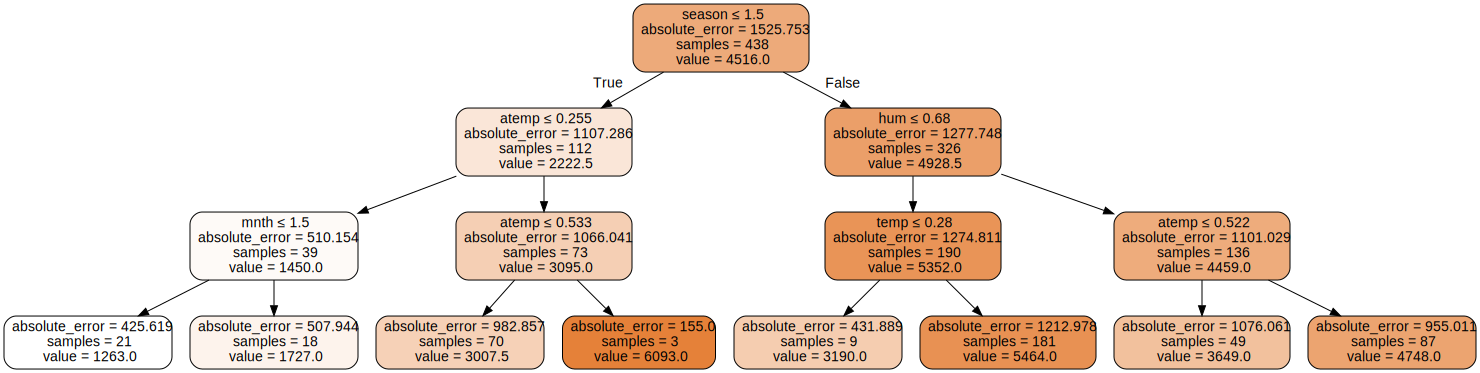

In [9]:
dot_data = export_graphviz(
        tree, out_file=None, 
        feature_names=X_train.columns, class_names='cnt',  
        filled=True, rounded=True, special_characters=True
    )  
graphviz.Source(dot_data)

In [10]:
pred = tree.predict(X_val)
metrics.mean_absolute_error(Y_val, pred)

1269.3219178082193

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте точность предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

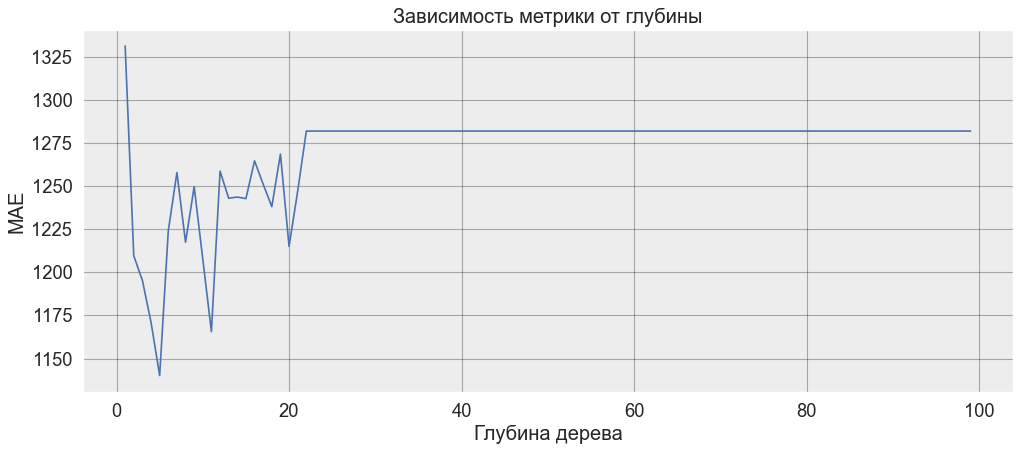

In [11]:
figure(figsize=(15, 6), dpi=80);

plt.rcParams.update({'axes.facecolor':'#ededed'})
x_plt = []
y_plt = []
for ma_depth in range(1, 100):
    tree = DecisionTreeRegressor(random_state=0, max_depth=ma_depth)
    tree.fit(X_train, Y_train)
    pred = tree.predict(X_val)
    x_plt.append(ma_depth)
    y_plt.append(metrics.mean_absolute_error(Y_val, pred))

plt.ylabel('MAE');
plt.xlabel("Глубина дерева");
plt.title("Зависимость метрики от глубины");
plt.plot(x_plt, y_plt);
plt.grid(color='black', alpha=0.3)

In [12]:
for depth, err in zip(x_plt, y_plt):
    print(depth, err)

1 1331.1965556561393
2 1209.5845623111766
3 1195.2597328046209
4 1171.0086934804192
5 1140.1338873367026
6 1224.022902709861
7 1257.8839510945677
8 1217.4474472238767
9 1249.6692997641628
10 1207.585904126315
11 1165.5783747679857
12 1258.664322407045
13 1242.9579191128505
14 1243.639851054577
15 1242.7256669069936
16 1264.6383561643836
17 1251.0690639269405
18 1238.068112633181
19 1268.545988258317
20 1215.0388127853882
21 1247.0753424657535
22 1281.9041095890411
23 1281.9041095890411
24 1281.9041095890411
25 1281.9041095890411
26 1281.9041095890411
27 1281.9041095890411
28 1281.9041095890411
29 1281.9041095890411
30 1281.9041095890411
31 1281.9041095890411
32 1281.9041095890411
33 1281.9041095890411
34 1281.9041095890411
35 1281.9041095890411
36 1281.9041095890411
37 1281.9041095890411
38 1281.9041095890411
39 1281.9041095890411
40 1281.9041095890411
41 1281.9041095890411
42 1281.9041095890411
43 1281.9041095890411
44 1281.9041095890411
45 1281.9041095890411
46 1281.9041095890411
47 

Видим, что оптимальное значение максимальной глубины - 5

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

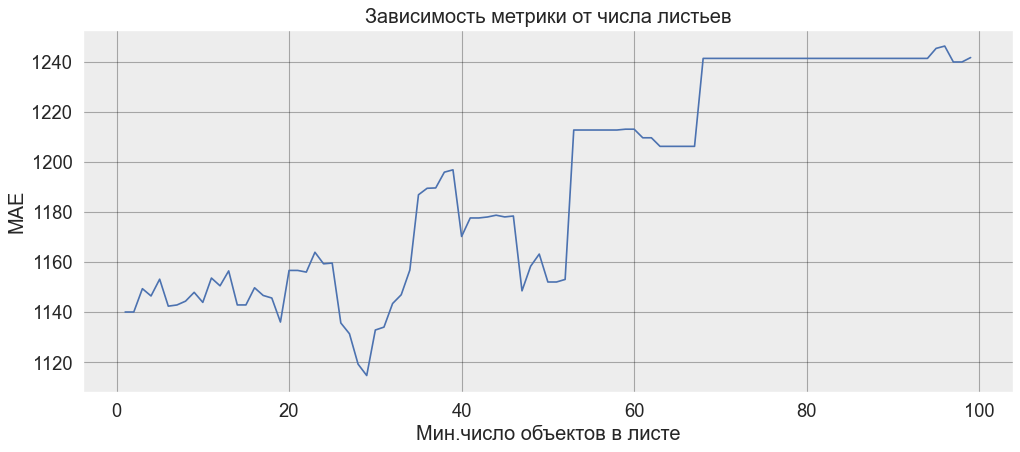

In [13]:
figure(figsize=(15, 6), dpi=80);

x_plt = []
y_plt = []
for leaf in range(1, 100):
    tree = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_leaf=leaf)
    tree.fit(X_train, Y_train)
    pred = tree.predict(X_val)
    x_plt.append(leaf)
    y_plt.append(metrics.mean_absolute_error(Y_val, pred))

plt.ylabel('MAE');
plt.xlabel("Мин.число объектов в листе");
plt.title("Зависимость метрики от числа листьев");
plt.plot(x_plt, y_plt);
plt.grid(color='black', alpha=0.3)

In [14]:
for leaf, err in zip(x_plt, y_plt):
    print(leaf, err)

1 1140.1338873367026
2 1140.1338873367026
3 1149.4467058608045
4 1146.541447800752
5 1153.235447663788
6 1142.4739633849324
7 1142.9411827495132
8 1144.4637963611676
9 1147.989120802408
10 1143.9832329013777
11 1153.6931999180672
12 1150.5936652837781
13 1156.540305857816
14 1142.960280606644
15 1142.960280606644
16 1149.8103441770722
17 1146.7440899291792
18 1145.7174370222788
19 1136.132183076913
20 1156.7328311506008
21 1156.7328311506008
22 1156.0637675911264
23 1163.974036389712
24 1159.3711216377817
25 1159.6733975979523
26 1135.7616618169877
27 1131.462096085915
28 1119.3299966039365
29 1114.7881668583398
30 1132.9507367371739
31 1134.1042987392993
32 1143.5171666209183
33 1147.0163930253564
34 1156.8738027389306
35 1186.9209421426374
36 1189.5126827937
37 1189.6553327438153
38 1195.942378845724
39 1196.8822650289956
40 1170.2881562447783
41 1177.671396043449
42 1177.671396043449
43 1178.060537604769
44 1178.7726898669148
45 1178.0825459376094
46 1178.4505015687641
47 1148.58824

Видим, что оптимальное значение минимального числа листьев - 29

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его точность на тестовой части выборки.

In [15]:
tree = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=29, criterion='absolute_error')
tree.fit(X_train, Y_train)
pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)
pred_test = tree.predict(X_test)

print("Ошибка MAE на обучающем наборе: {:.3f}".format(metrics.mean_absolute_error(Y_train, pred_train)))
print("Ошибка MAE на валидационном наборе: {:.3f}".format(metrics.mean_absolute_error(Y_val, pred_val)))
print("Ошибка MAE на тестовом наборе: {:.3f}".format(metrics.mean_absolute_error(Y_test, pred_test)))

Ошибка MAE на обучающем наборе: 978.904
Ошибка MAE на валидационном наборе: 1245.616
Ошибка MAE на тестовом наборе: 1283.568


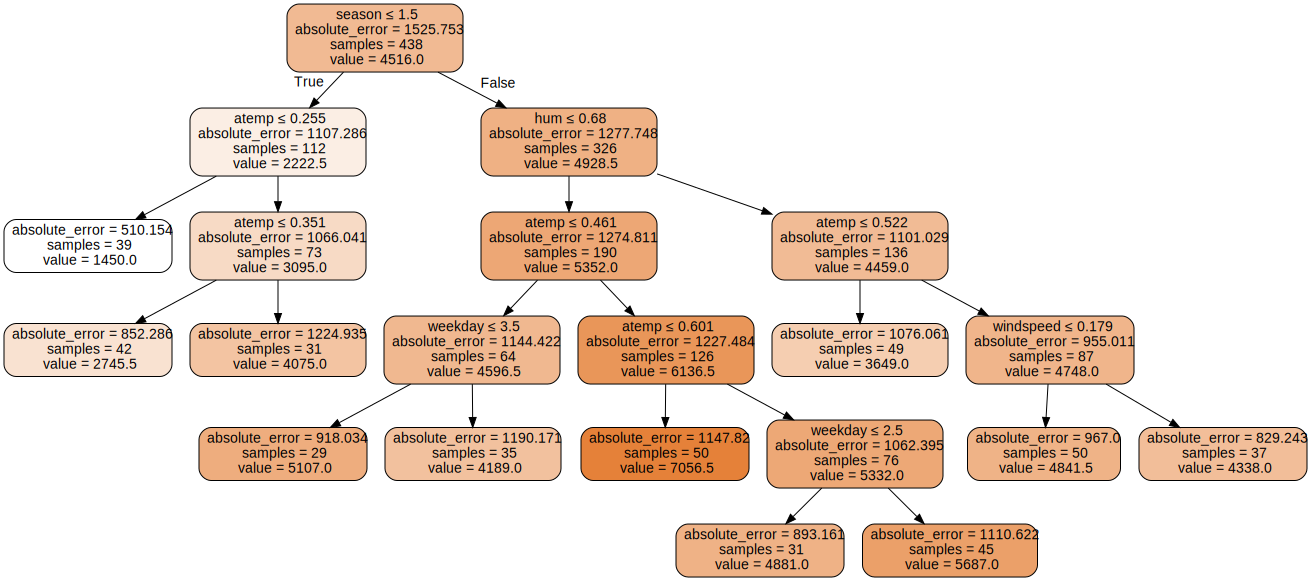

In [16]:
dot_data = export_graphviz(
        tree, out_file=None, 
        feature_names=X_train.columns, class_names='cnt',  
        filled=True, rounded=True, special_characters=True
    )  
graphviz.Source(dot_data)

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

In [17]:
for name, score in zip(X_train.columns, tree.feature_importances_):
    print(name, score)

season 0.5332247828991316
mnth 0.0
holiday 0.0
weekday 0.03356713426853707
workingday 0.0
weathersit 0.0
temp 0.0
atemp 0.31361055444221775
hum 0.10267201068804274
windspeed 0.01692551770207081


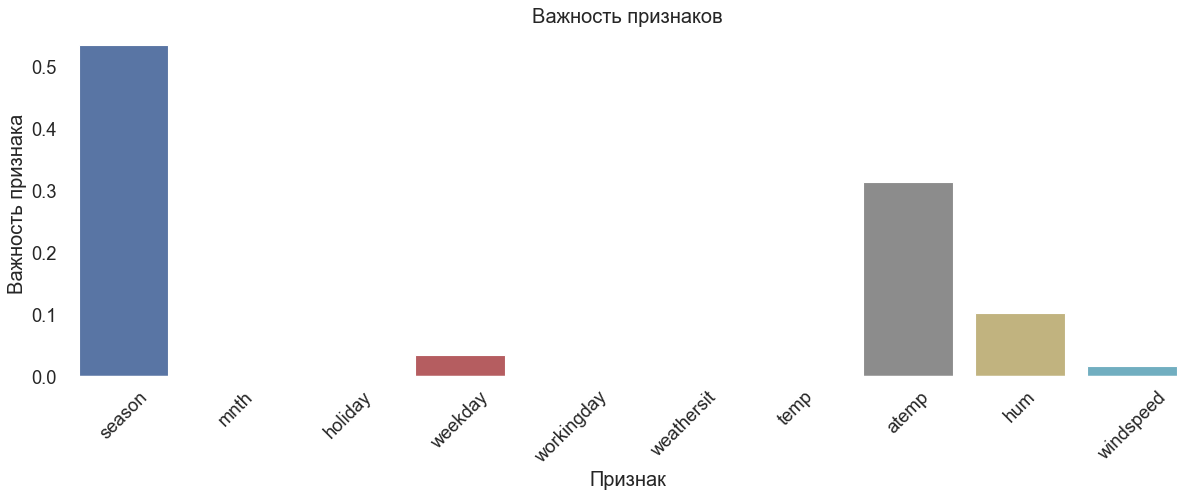

In [25]:
figure(figsize=(15, 6), dpi=80);
plt.rcParams.update({'axes.facecolor':'white'})

res = {}
res['name'] = X_train.columns
res['score'] = tree.feature_importances_
sns.barplot(x="name", y="score", data=res);
plt.xticks(rotation=45)
plt.tight_layout();
plt.ylabel('Важность признака');
plt.xlabel("Признак");
plt.title("Важность признаков");

Сделайте выводы.

Видим, что важно лишь маленькое число признаков, и самый важный признак - категориальный season, 3/5 признаков с ненулевой важностью - не категориальные, то есть, почти все не категориальные признаки важны для предсказания и далеко не все категориальные важны для предсказания<br>
Подобрав оптимальные параметры для дерева немного улучшили модель, но не значительно<br>

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [19]:
n_estimators = 500
model = RandomForestRegressor(n_estimators=n_estimators, criterion='mae')
model.fit(X_train, Y_train)

pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

print("Ошибка MAE на обучающем наборе: {:.3f}".format(metrics.mean_absolute_error(Y_train, pred_train)))
print("Ошибка MAE на валидационном наборе: {:.3f}".format(metrics.mean_absolute_error(Y_val, pred_val)))

Ошибка MAE на обучающем наборе: 375.806
Ошибка MAE на валидационном наборе: 1090.466


Постройте график зависимости точности модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у обученной модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`.

In [20]:
model.estimators_[1]

DecisionTreeRegressor(criterion='absolute_error', max_features='auto',
                      random_state=732028406)

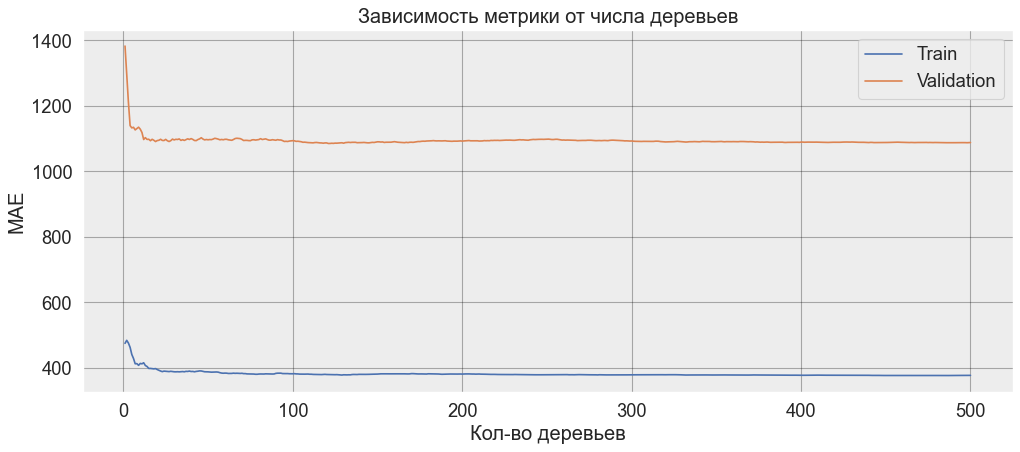

In [21]:
figure(figsize=(15, 6), dpi=80);

x_train_plt = np.arange(1, 501)
y_train_plt = []
x_val_plt = np.arange(1, 501)
y_val_plt = []
model = RandomForestRegressor(n_estimators=500, criterion='mae')
model.fit(X_train, Y_train)
ests = model.estimators_

for est in range(1, 501):
    cur_model = model
    cur_model.estimators_ = ests[:est]
    #cur_model.fit(X_train, Y_train)
    pred = cur_model.predict(X_train)
    y_train_plt.append(metrics.mean_absolute_error(Y_train, pred))
    pred = cur_model.predict(X_val)
    y_val_plt.append(metrics.mean_absolute_error(Y_val, pred))

plt.ylabel('MAE');
plt.xlabel("Кол-во деревьев");
plt.title("Зависимость метрики от числа деревьев");
plt.plot(x_train_plt, y_train_plt, label='Train');
plt.plot(x_val_plt, y_val_plt, label='Validation');
plt.grid(color='black', alpha=0.3)
plt.legend();

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

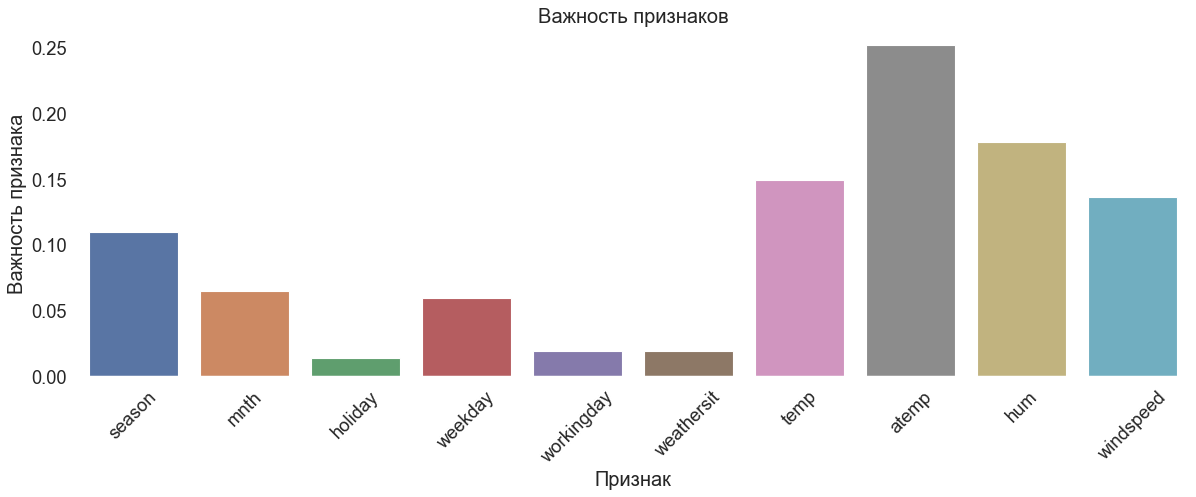

In [26]:
figure(figsize=(15, 6), dpi=80);
plt.rcParams.update({'axes.facecolor':'white'})

res = {}
res['name'] = X_train.columns
res['score'] = model.feature_importances_
sns.barplot(x="name", y="score", data=res);
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Важность признака');
plt.xlabel("Признак");
plt.title("Важность признаков");

In [23]:
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)
pred_test = model.predict(X_test)
print("Ошибка MAE на обучающем наборе: {:.3f}".format(metrics.mean_absolute_error(Y_train, pred_train)))
print("Ошибка MAE на валидационном наборе: {:.3f}".format(metrics.mean_absolute_error(Y_val, pred_val)))
print("Ошибка MAE на тестовом наборе: {:.3f}".format(metrics.mean_absolute_error(Y_test, pred_test)))

Ошибка MAE на обучающем наборе: 377.416
Ошибка MAE на валидационном наборе: 1088.419
Ошибка MAE на тестовом наборе: 1057.636


Сделайте выводы.

В дереве по гистограмме важности признаков можно понять, что не все признаки важны для ответа и есть признаки, вес которых сильно перевешивает, в отличие от леса, где все признаки важны<br>
Использование леса помогло улучшить точность ответа по метрике MAE, даже несмотря на то, что в дереве решений мы почти ничего не подбирали, а в дереве решений искали оптимальные параметры<br>
Зависимость метрики от числа деревьев почти постоянна, когда число деревьев хотя бы уже 50 и в дальнейшем снижается не сильно. Посчитанный результат на Validation и на Test примерно равны и намного хуже, чем результат на Train<br>
Использование леса очень сильно улучшило результат на train(1000->400) и на других выборках тоже, но не так сильно.<br>
Стоит отметить, что в лесе важность не категориальных признаков намнго выше, чем в дереве, каждый не категориальный признак важнее чем любой из категориальных